## Lab 4 - Analyzing Real Estate Data in St. Petersburg
We have data from Yandex.Realty classified https://realty.yandex.ru containing real estate listings for apartments in St. Petersburg and Leningrad Oblast from 2016 till the middle of August 2018. In this Lab you'll learn how to work with datasets in python using pandas library for data analysis using the provided data. 
For datasets like this it becomes hard to use Excel because of its size. If you learn how to work with pandas you'll be able to do basic analytical research much faster than in Excel.
To execute code IPython notebook click on the Cell and press Shift-Enter.
If you don't have any experience with Jupyter notebooks, please look at this tutorial: https://mybinder.org/v2/gh/ipython/ipython-in-depth/master?filepath=binder/Index.ipynb

### Main objectives
After successful completion of the lab work students will be able to:
-	Analyze large datasets that don't work well in Excel using IPython notebook and pandas library
-   Find outliers and remove them in the datasets
-	Calculate different statistics on data fields


### Tasks
-	Calculate median and mean sell and rent prices in St. Petersburg
-   Find outliers: too cheap or too expensive apartments which seem to be a wrong data. Remove them from the dataset.
-	Find houses with the most cheapest and most expensive prices per square meter.
-   Analyze how many rent offers have the commission and what is the most popular commission



In [2]:
# let's import pandas library and set options to be able to view data right in the browser
# Assign pd for a short alias for pandas library
import pandas as pd
# Call set_option function fron pandas library to edit them limit for number of the displayed
# columns, width of all columns and maximum width of one column
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [3]:
# let's look what is inside our data file to understand how we can export it. 
# We can use linux command "head" which shows the first row in the file. 
# In IPython notebooks you can execute linux commands using "!" prefixe before the command name. 
# This mechanism is called "IPython magic"
!head -n 3 ../spb.real.estate.archive.2018.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# if you don't remember what linux command does (i.e. what is -n), you can always look for help
!head --help

Usage: head [OPTION]... [FILE]...
Print the first 10 lines of each FILE to standard output.
With more than one FILE, precede each with a header giving the file name.

With no FILE, or when FILE is -, read standard input.

Mandatory arguments to long options are mandatory for short options too.
  -c, --bytes=[-]NUM       print the first NUM bytes of each file;
                             with the leading '-', print all but the last
                             NUM bytes of each file
  -n, --lines=[-]NUM       print the first NUM lines instead of the first 10;
                             with the leading '-', print all but the last
                             NUM lines of each file
  -q, --quiet, --silent    never print headers giving file names
  -v, --verbose            always print headers giving file names
  -z, --zero-terminated    line delimiter is NUL, not newline
      --help     display this help and exit
      --version  output version information and exit

NUM may have a mu

In [24]:
# we see that it's tab separated file, we can load it with pd.read_table method
# load our dataset and see which data it contains.
# HINT: you can type 'Tab' after starting typing the filename and IPython will automatically fill it for you
# After this command a new variable will be created (spb_df) containing pandas dataframe with data in our file
# You can think of dataframe structure as an analogue of Excel sheet
spb_df = pd.read_csv('../practice/data/spb.real.estate.archive.2018.csv')

In [5]:
# HINT: if you don't know which arguments any function takes or what it does you can check the documenation right 
# in the notebook just by adding "?" after the function name. Let's look at pandas read_table function:
pd.read_table?

In [25]:
# let's check how much data in terms of rows we have where each row represent 
# one offer from Yandex.Realty
len(spb_df)

429187

In [26]:
# let's look at random sample of size 10 of the loaded dataset to understand what's inside
spb_df.sample(5)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
154542,8.456630e+18,2017-03-24T00:00:00+03:00,2018-02-07T00:00:00+03:00,7300000,19,False,3,False,76.3,13.3,41.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, посёлок Парголово, Заречная улица, 25",4.109970e+18
259241,8.478390e+18,2017-12-12T00:00:00+03:00,2018-08-16T00:00:00+03:00,10400000,3,False,2,False,45.7,7.5,23.7,NaN,NaN,1,2,"Россия, Санкт-Петербург, Караванная улица, 7",6.550500e+18
401767,4.525350e+18,2018-07-18T00:00:00+03:00,2018-07-20T00:00:00+03:00,20000,10,False,1,False,38.0,10.0,20.0,NaN,10.0,2,2,"Россия, Санкт-Петербург, Ленинский проспект, 69к1",1.861670e+18
141536,3.375340e+18,2017-02-25T00:00:00+03:00,2017-02-28T00:00:00+03:00,30000,8,False,1,False,36.0,10.0,16.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парашютная улица, 54",6.764010e+18
360168,5.152260e+18,2018-04-12T00:00:00+03:00,2018-05-30T00:00:00+03:00,18000,9,False,1,False,35.0,7.0,17.0,100.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Наставников, 20к2",2.264730e+18


In [8]:
len(spb_df)

429187

In [9]:
spb_df.sample(5000).to_csv('spb.real.estate.archive.sample5000.tsv', index = False, sep='\t')

### Analyze prices for rent and sell
We see that we have both RENT and SELL data. 
<p>offer_type column contains data to distinct them, 2 stands for RENT, 1 for SELL


#### Analyze rent prices

In [11]:
# at first let's split our dataframe to rent and sell
# Select some part of dataframe according to conditions in brackets
rent_df = spb_df[spb_df.offer_type == 2]
sell_df = spb_df[spb_df.offer_type == 1]
# .format function allows you to put variales' values instead of {} in the final string
print("Total rent data size: {}".format(len(rent_df)))
print("Total sell data size: {}".format(len(sell_df)))

Total rent data size: 171186
Total sell data size: 258001


In [12]:
# let's check median and price for renting apartments
# .last_price indicates that you use data just from the column named last_price
rent_median_price = rent_df.last_price.median()
rent_mean_price = rent_df.last_price.mean()
print("Rent median price: {}".format(rent_median_price))
print("Rent mean price: {}".format(rent_mean_price))

Rent median price: 25000.0
Rent mean price: 31719.256638977487


In [13]:
# Just to look at data of one column you can select this column. 
# 'head' function will take only first rows 
rent_df.last_price.head(10)

1086    20000.0
1096    40000.0
1097    45000.0
1149    21000.0
1514    25000.0
1515    35000.0
1516    22000.0
1537    20000.0
1555    26000.0
1695    25000.0
Name: last_price, dtype: float64

#### Let's look at the most expensive apartments in rent

In [14]:
# .max function returns the maximum value across all rows
max_price_rent = rent_df.last_price.max()

In [15]:
print("Max price in rent: {}".format(max_price_rent))

Max price in rent: 4900000.0


In [16]:
# Now select all offers where price is equal to maximum value across all rent prices
rent_df_max = rent_df[rent_df.last_price == max_price_rent]

In [17]:
rent_df_max

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
123675,5594900220237251840,2017-01-16T00:00:00+03:00,2017-01-16T00:00:00+03:00,4900000.0,3,False,3,False,55.4,5.5,42.1,NaN,0.0,2,2,"Россия, Санкт-Петербург, Новочеркасский проспект, 36",7844665691371923607


We can see that it was probably a mistake. It's hard to imagine why an aparment could cost 4.9 mln rubles per month. To analyze it let's look at the random sample of rent offers with prices of more than 1 mln rubles.

In [18]:
# Knowing real estate market in St.Petersburg we understand 
# that offers with rent prices over 1 million rubles are outliers
outliers_rent = rent_df[rent_df.last_price > 1000000]
print("Number of outliers in rent: {}".format(len(outliers_rent)))

Number of outliers in rent: 22


In [19]:
outliers_rent.sample(5)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
409084,1523340115924662017,2018-07-26T00:00:00+03:00,2018-08-20T00:00:00+03:00,1752250.0,21,False,2,False,38.0,13.0,25.0,50.0,10.0,2,2,"Россия, Санкт-Петербург, посёлок Парголово, улица Фёдора Абрамова, 23к1",4731794338099306507
398642,6920678992116580097,2018-07-13T00:00:00+03:00,2018-07-16T00:00:00+03:00,1432748.0,9,False,2,False,59.0,11.0,35.0,50.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Энтузиастов, 43к1",8806624394643633231
123451,4266909851082118912,2017-01-14T00:00:00+03:00,2017-05-27T00:00:00+03:00,3100000.0,2,False,1,False,39.0,7.0,20.0,NaN,3.0,2,2,"Россия, Санкт-Петербург, Петергоф, Озерковая улица, 39к1",6053955221850724766
83893,4075481786711135488,2016-08-18T00:00:00+03:00,2016-08-18T00:00:00+03:00,3500000.0,1,False,2,False,55.0,8.3,30.5,NaN,3.0,2,2,"Россия, Ленинградская область, Всеволожск, микрорайон Южный, Центральная улица, 13",4521154714631889065
12990,3988133,2015-09-19T00:00:00+03:00,2016-04-13T00:00:00+03:00,3450000.0,19,False,1,True,30.0,NaN,NaN,NaN,3.0,2,2,"Россия, Санкт-Петербург, посёлок Парголово, Заречная улица, 19к1",2079266574874175179


In [20]:
# We see that all of these offers are results of user mistakes.
# Pause to think what kind of mistakes might cause such numbers?
# Let's now look at rent offers below 1M but more than 500K

In [21]:
rent_df[(rent_df.last_price > 500000) & (rent_df.last_price < 1000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
83621,6302977522903470578,2015-05-28T00:00:00+03:00,2017-04-26T00:00:00+03:00,550000.0,6,False,4,False,180.0,18.0,122.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507
89836,6302977522901450489,2016-09-14T00:00:00+03:00,2016-09-15T00:00:00+03:00,800000.0,2,False,2,False,80.0,20.0,40.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Большая Морская улица, 27",8010764606439654926
106222,4377907628678297857,2016-11-07T00:00:00+03:00,2017-03-13T00:00:00+03:00,600000.0,6,False,4,False,187.0,NaN,127.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507
172166,3376106655979657514,2017-02-24T00:00:00+03:00,2017-05-24T00:00:00+03:00,600000.0,6,False,4,False,200.0,NaN,103.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к2",7861463534572863508
172950,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507
253075,9174606537144832259,2017-11-16T00:00:00+03:00,2018-08-20T00:00:00+03:00,600000.0,1,False,4,False,165.0,NaN,115.0,NaN,6.0,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355
321216,2596865999798823681,2018-03-31T00:00:00+03:00,2018-04-04T00:00:00+03:00,575000.0,3,False,4,False,120.0,NaN,NaN,50.0,1.0,2,2,"Россия, Санкт-Петербург, Кременчугская улица, 17к3",9078299753075959719
323711,9106659135022232833,2018-04-03T00:00:00+03:00,2018-06-15T00:00:00+03:00,600000.0,1,False,4,False,90.0,13.0,54.0,0.0,11.0,2,2,"Россия, Санкт-Петербург, Большой Сампсониевский проспект, 33/1",192308642065385452
336616,8867625833179319559,2018-04-21T00:00:00+03:00,2018-08-09T00:00:00+03:00,600000.0,1,False,4,False,117.0,20.0,83.0,0.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355
419166,5152264856292210972,2018-02-01T00:00:00+03:00,2018-08-16T00:00:00+03:00,600000.0,1,False,4,False,140.0,95.0,100.0,100.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355


In [22]:
# for these cases sometimes it seems that the price is correct - in the unified_address column we
# see that these offers are from elite houses
# like here: https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20проспект%20Динамо%2C%206/snyat/kvartira/
# but for some of them price seems to be 10 times more than it should be, like here
# https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20Большая%20Морская%20улица%2C%2027/snyat/kvartira/
# let's find these cases

### Calculate price per square meter, get median prices for house and find outliers with the help of this

In [23]:
# Create a new column price_per_sq_m and calculate price per sq m
rent_df['price_per_sq_m'] = rent_df.last_price/rent_df.area

<ipython-input-23-06097015f9ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_df['price_per_sq_m'] = rent_df.last_price/rent_df.area


In [24]:
rent_df.head(5)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m
1086,1100202,2015-01-24T00:00:00+03:00,2016-01-19T00:00:00+03:00,20000.0,7,False,1,False,28.0,8.0,20.0,100.0,3.0,2,2,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",6719200042030752141,714.285714
1096,5028522699704970725,2015-01-25T00:00:00+03:00,2016-01-20T00:00:00+03:00,40000.0,4,False,2,False,72.0,10.0,44.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 66",3406104650917898355,555.555556
1097,5028522699709767236,2015-01-25T00:00:00+03:00,2016-01-21T00:00:00+03:00,45000.0,2,False,2,False,55.0,NaN,33.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Большой проспект П.С., 102",2357095685903407888,818.181818
1149,1100874,2015-01-28T00:00:00+03:00,2016-01-16T00:00:00+03:00,21000.0,5,False,1,False,35.0,8.0,18.0,NaN,11.0,2,2,"Россия, Санкт-Петербург, Лужская улица, 8",5887402119500981764,600.000000
1514,875413,2015-02-13T00:00:00+03:00,2016-01-23T00:00:00+03:00,25000.0,10,False,1,True,44.0,15.0,18.0,90.0,10.0,2,2,"Россия, Санкт-Петербург, Учительская улица, 3",6527910144166454997,568.181818


In [25]:
# find what's median and mean price per square meter in rent
median_price_per_sq_m = rent_df.price_per_sq_m.median()
mean_price_per_sq_m = rent_df.price_per_sq_m.mean()
print("Median price per sq m in rent: {}".format(median_price_per_sq_m))
print("Mean price per sq m in rent: {}".format(mean_price_per_sq_m))

Median price per sq m in rent: 550.0
Mean price per sq m in rent: 600.1110692967957


#### Find median price per sq m per house

In [26]:
# .groupby function groups dataframe by a selected column (unified_address)
# For each address we then take a median of price per sq m and return a new dataframe 
# with a result
house_rent_df = rent_df.groupby('unified_address').price_per_sq_m.median().reset_index()

In [27]:
house_rent_df.head(5)

,unified_address,price_per_sq_m
0,"Россия, Ленинградская область, Бокситогорск, Комсомольская улица, 5А",171.428571
1,"Россия, Ленинградская область, Бокситогорск, Южная улица, 15",250.000000
2,"Россия, Ленинградская область, Бокситогорск, улица Металлургов, 7",164.948454
3,"Россия, Ленинградская область, Бокситогорск, улица Павлова, 37",138.888889
4,"Россия, Ленинградская область, Бокситогорский район, Пикалёво, 6-й микрорайон, 25",195.652174


In [28]:
# Rename the column with a 'rename' function in this new dataframe
house_rent_df.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)

#### Merge rent data with house median prices and inspect outliers

In [29]:
# With a 'merge' function join two dataframes.
# As these 2 dataframes have only one common column name (unified_address) it will merge dataframes by it
rent_df = rent_df.merge(house_rent_df)

In [30]:
# Assign outliers if price per sq m is 5 times higher than the median value in the house
outliers = rent_df[(rent_df.price_per_sq_m/rent_df.house_price_sqm_median) > 5]

In [31]:
print(len(outliers))

49


In [32]:
outliers.sample(10)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
131397,8492010403417061889,2018-04-06T00:00:00+03:00,2018-04-24T00:00:00+03:00,3500000.0,8,False,0,True,30.0,NaN,NaN,NaN,NaN,2,2,"Россия, Санкт-Петербург, Репищева улица, 10к1",1967793054474181316,116666.666667,729.988466
139697,8535940262361472000,2018-07-12T00:00:00+03:00,2018-07-16T00:00:00+03:00,2900000.0,2,False,1,False,29.3,7.2,15.1,NaN,NaN,2,2,"Россия, Санкт-Петербург, Альпийский переулок, 22",2164916565767642422,98976.109215,576.707727
146984,2484217340613565185,2018-05-26T00:00:00+03:00,2018-06-02T00:00:00+03:00,300000.0,15,False,2,False,60.0,12.0,35.0,50.0,10.0,2,2,"Россия, Санкт-Петербург, улица Шелгунова, 7к1",4224014818886931677,5000.000000,500.000000
11828,6312877784414089984,2018-03-27T00:00:00+03:00,2018-03-27T00:00:00+03:00,200500.0,9,False,2,False,60.0,10.0,32.0,NaN,3.0,2,2,"Россия, Санкт-Петербург, проспект Народного Ополчения, 131",7393117043173358830,3341.666667,533.333333
80391,5565310413830597669,2018-06-19T00:00:00+03:00,2018-06-26T00:00:00+03:00,200000.0,13,False,0,True,40.0,NaN,21.5,100.0,NaN,2,2,"Россия, Ленинградская область, Всеволожский район, деревня Новое Девяткино, Арсенальная улица, 7",1966219418622870596,5000.000000,452.272727
117317,8256452766188712792,2018-05-11T00:00:00+03:00,2018-08-20T00:00:00+03:00,400000.0,3,False,3,False,85.0,15.0,55.0,50.0,1.0,2,2,"Россия, Санкт-Петербург, Итальянская улица, 11",15264832366839851,4705.882353,933.333333
140011,8260656212628561921,2017-03-14T00:00:00+03:00,2017-05-18T00:00:00+03:00,4300000.0,4,False,1,False,38.0,9.0,18.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Пушкин, Оранжерейная улица, 39",1604138570197506217,113157.894737,595.238095
109762,5565310413830598600,2018-06-19T00:00:00+03:00,2018-06-26T00:00:00+03:00,180000.0,9,False,0,True,20.0,NaN,NaN,100.0,NaN,2,2,"Россия, Санкт-Петербург, Запорожская улица, 23к2",1317815542510856863,9000.000000,688.172043
32281,7796157803399736832,2018-06-12T00:00:00+03:00,2018-07-12T00:00:00+03:00,150000.0,11,False,1,False,42.0,NaN,NaN,NaN,NaN,2,2,"Россия, Санкт-Петербург, Пулковское шоссе, 38к7",6690775821291644660,3571.428571,641.025641
84160,5148571494042384844,2016-03-15T00:00:00+03:00,2016-06-06T00:00:00+03:00,240000.0,4,False,2,False,47.0,9.0,30.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, улица Брянцева, 28",130991341981241322,5106.382979,478.260870


#### Clean data from the outliers

In [33]:
# Let's create a new dataframe with clean data.
# With ~ we can select the data which does NOT correspond to the required conditions
rent_df_cleaned = rent_df[~((rent_df.price_per_sq_m/rent_df.house_price_sqm_median) > 5)]

In [34]:
# check that in the middle segment everything is fine now
rent_df_cleaned[(rent_df_cleaned.last_price > 500000) & (rent_df_cleaned.last_price < 1000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
95391,3376106655979657514,2017-02-24T00:00:00+03:00,2017-05-24T00:00:00+03:00,600000.0,6,False,4,False,200.0,NaN,103.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к2",7861463534572863508,3000.000000,1385.501355
96070,6302977522903470578,2015-05-28T00:00:00+03:00,2017-04-26T00:00:00+03:00,550000.0,6,False,4,False,180.0,18.0,122.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3055.555556,1442.307692
96075,4377907628678297857,2016-11-07T00:00:00+03:00,2017-03-13T00:00:00+03:00,600000.0,6,False,4,False,187.0,NaN,127.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3208.556150,1442.307692
96091,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3421.052632,1442.307692
154614,9174606537144832259,2017-11-16T00:00:00+03:00,2018-08-20T00:00:00+03:00,600000.0,1,False,4,False,165.0,NaN,115.0,NaN,6.0,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,3636.363636,3636.363636
154615,8867625833179319559,2018-04-21T00:00:00+03:00,2018-08-09T00:00:00+03:00,600000.0,1,False,4,False,117.0,20.0,83.0,0.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,5128.205128,3636.363636
154617,5152264856292210972,2018-02-01T00:00:00+03:00,2018-08-16T00:00:00+03:00,600000.0,1,False,4,False,140.0,95.0,100.0,100.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,4285.714286,3636.363636


In [35]:
# look at offers with price > 1 000 000
rent_df_cleaned[(rent_df_cleaned.last_price >= 1000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
67005,5199154,2016-01-25T00:00:00+03:00,2016-01-26T00:00:00+03:00,3800000.0,3,False,2,False,51.0,6.0,30.5,NaN,0.0,2,2,"Россия, Санкт-Петербург, Пискарёвский проспект, 149",7757194067653498771,74509.803922,74509.803922
95935,8743101202301731585,2016-10-13T00:00:00+03:00,2016-11-12T00:00:00+03:00,1500000.0,3,False,2,False,54.7,NaN,NaN,NaN,7.0,2,2,"Россия, Ленинградская область, Выборгский район, Светогорское городское поселение, поселок городского типа Лесогорский, улица Труда, 7",2755098623625145659,27422.303473,13811.700183
114024,4075481786711135488,2016-08-18T00:00:00+03:00,2016-08-18T00:00:00+03:00,3500000.0,1,False,2,False,55.0,8.3,30.5,NaN,3.0,2,2,"Россия, Ленинградская область, Всеволожск, микрорайон Южный, Центральная улица, 13",4521154714631889065,63636.363636,63636.363636
164662,4088017598264857345,2018-02-09T00:00:00+03:00,2018-03-21T00:00:00+03:00,1330000.0,3,False,1,False,33.0,6.0,19.0,NaN,3.0,2,2,"Россия, Ленинградская область, Луга, проспект Урицкого, 65",1792010144615909485,40303.030303,40303.030303


In [36]:
# we see, that all of them are outliers, they were not cleaned by the house price per sq m median 
# because it was the only one or just one of two offers per house
# let's clean them also
# Store result in the same dataframe
rent_df_cleaned = rent_df_cleaned[rent_df_cleaned.last_price < 1000000]

In [37]:
# let's examine apartments with big price per sq m
rent_df_cleaned[rent_df_cleaned.price_per_sq_m > 3000]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
549,8596035942924139265,2018-05-17T00:00:00+03:00,2018-07-04T00:00:00+03:00,450000.0,6,False,2,False,106.0,15.0,65.0,30.0,NaN,2,2,"Россия, Санкт-Петербург, Воскресенская набережная, 4",7262659557693263963,4245.283019,975.609756
28182,1492050389917501301,2017-06-07T00:00:00+03:00,2017-06-07T00:00:00+03:00,195000.0,4,False,1,False,57.0,8.0,19.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, проспект Добролюбова, 2",6684242979485775735,3421.052632,779.220779
39213,3793550987719225600,2017-03-19T00:00:00+03:00,2017-11-02T00:00:00+03:00,310000.0,3,False,4,False,100.0,14.0,71.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Лиговский проспект, 123",2861706125080798064,3100.000000,976.307190
44574,1896730477284436579,2017-05-31T00:00:00+03:00,2017-05-31T00:00:00+03:00,230000.0,9,False,2,False,67.0,14.0,30.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Глухая Зеленина улица, 6",6445545084936583797,3432.835821,923.076923
96070,6302977522903470578,2015-05-28T00:00:00+03:00,2017-04-26T00:00:00+03:00,550000.0,6,False,4,False,180.0,18.0,122.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3055.555556,1442.307692
96075,4377907628678297857,2016-11-07T00:00:00+03:00,2017-03-13T00:00:00+03:00,600000.0,6,False,4,False,187.0,NaN,127.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3208.556150,1442.307692
96091,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3421.052632,1442.307692
99409,7102677476104578816,2016-05-20T00:00:00+03:00,2016-05-20T00:00:00+03:00,270000.0,1,False,1,False,80.0,NaN,NaN,0.0,3.0,2,2,"Россия, Санкт-Петербург, Загородный проспект, 5",8810747501928407960,3375.000000,1978.197674
104668,159653575951184384,2016-06-16T00:00:00+03:00,2016-07-01T00:00:00+03:00,300000.0,2,False,3,False,54.0,8.0,35.0,50.0,11.0,2,2,"Россия, Санкт-Петербург, 18-я линия В.О., 43",6003296125598219505,5555.555556,5555.555556
150701,1492050390917641037,2016-10-28T00:00:00+03:00,2017-06-07T00:00:00+03:00,400000.0,4,False,3,False,130.0,13.0,85.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Константиновский проспект, 23",5091810811209082905,3076.923077,3484.848485


In [38]:
# we can see that outliers are those which are in houses with price per sq m below 1000 rubles, 
# and those which are the same with median, in which case it's the only offer per house
outliers_count = len(rent_df_cleaned[(rent_df_cleaned.price_per_sq_m > 3000) 
                                     & ((rent_df_cleaned.house_price_sqm_median < 1000) 
                                        | (rent_df_cleaned.house_price_sqm_median == rent_df_cleaned.price_per_sq_m))])
print("outliers found: {}".format(outliers_count))
rent_df_cleaned = rent_df_cleaned[~((rent_df_cleaned.price_per_sq_m > 3000) 
                                     & ((rent_df_cleaned.house_price_sqm_median < 1000) 
                                        | (rent_df_cleaned.house_price_sqm_median == rent_df_cleaned.price_per_sq_m)))]

outliers found: 8


In [39]:
# now max price should be correct, lets look at this offer
max_rent_apartment = rent_df_cleaned[rent_df_cleaned.last_price == rent_df_cleaned.last_price.max()]
max_rent_apartment

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
96091,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3421.052632,1442.307692


In [40]:
# let's look at house address. 
# with 'iloc' property we can take any row by index, 
# in this case we take the first item to get the address
max_rent_apartment.unified_address.iloc[0]

'Россия, Санкт-Петербург, Парадная улица, 3к1'

In [41]:
# impoort urllib to prepare correct URLs for looking at offers archive 
# at https://realty.yandex.ru/archive
import urllib

In [42]:
# if you're interested in images of this apartment you can find it here: 
# https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20Парадная%20улица%2C%203к1/snyat/kvartira/2/?roomsTotal=4

# let's print the URL of the page, on which we can find our offer
# we use urllib.parse.quote function to get URL part from our address, otherwise URL wouldn't be correct
# print("https://realty.yandex.ru/archive/{}/snyat/kvartira/2/?roomsTotal=4".format(urllib.parse.quote(max_rent_apartment.unified_address.iloc[0])))
# print("https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/{}/snyat/kvartira/?roomsTotal=4".format(urllib.parse.quote(max_rent_apartment.unified_address.iloc[0])))
print("https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/{}/snyat/kvartira/".format(urllib.parse.quote(max_rent_apartment.unified_address.iloc[0])))
# use filters there to select only apartments with 4 rooms

https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%9F%D0%B0%D1%80%D0%B0%D0%B4%D0%BD%D0%B0%D1%8F%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C%203%D0%BA1/snyat/kvartira/


### Find houses with the most cheapest and the most expensive rent price

In [43]:
# Create a new dataframe with houses and median price per sq m
# This time it should with the data calculated without outliers
house_rent_df_cleaned = rent_df_cleaned.groupby('unified_address').price_per_sq_m.median().reset_index()
house_rent_df_cleaned.rename(columns = {'price_per_sq_m': 'house_price_sqm_median_cleaned'}, inplace = True)

In [44]:
most_expensive_house = house_rent_df_cleaned[house_rent_df_cleaned.house_price_sqm_median_cleaned == house_rent_df_cleaned.house_price_sqm_median_cleaned.max()]
most_expensive_house

,unified_address,house_price_sqm_median_cleaned
16851,"Россия, Санкт-Петербург, проспект Динамо, 6",3705.357143


In [45]:
# you can look at the most expensive house here
# https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20проспект%20Динамо%2C%206/snyat/kvartira/
print("https://realty.yandex.ru/archive/{}/snyat/kvartira/".format(urllib.parse.quote(most_expensive_house.unified_address.iloc[0])))

https://realty.yandex.ru/archive/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%BF%D1%80%D0%BE%D1%81%D0%BF%D0%B5%D0%BA%D1%82%20%D0%94%D0%B8%D0%BD%D0%B0%D0%BC%D0%BE%2C%206/snyat/kvartira/


#### Find the most cheapest house for rent

In [46]:
most_cheapest_house = house_rent_df_cleaned[house_rent_df_cleaned.house_price_sqm_median_cleaned == house_rent_df_cleaned.house_price_sqm_median_cleaned.min()]
most_cheapest_house

,unified_address,house_price_sqm_median_cleaned
2421,"Россия, Ленинградская область, Кириши, улица Мира, 14",50.0


In [47]:
# we see that it's located in Leningrad Oblast, let's look only in St. Petersburg data
house_rent_df_cleaned_spb = house_rent_df_cleaned[house_rent_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')]
house_rent_df_cleaned_spb[house_rent_df_cleaned_spb.house_price_sqm_median_cleaned == house_rent_df_cleaned_spb.house_price_sqm_median_cleaned.min()]

,unified_address,house_price_sqm_median_cleaned
4852,"Россия, Санкт-Петербург, Большая Зеленина улица, 12",76.923077


#### Clean cheap outliers
We see that we should clean the data, the cheapest house above is definitely a mistake, and it is an underground station building. You can check it at https://maps.yandex.ru

In [48]:
# consider only data inside the city without oblast
rent_df_cleaned_spb = rent_df_cleaned[rent_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')]
median_price_per_sq_m_in_spb = rent_df_cleaned_spb.price_per_sq_m.median()
print("Median price per sq m in St. Petersburg in rent: {}".format(median_price_per_sq_m_in_spb))

Median price per sq m in St. Petersburg in rent: 555.5555555555555


In [49]:
# look at cheap apartments which are more than two times cheaper 
# than the median value of offers we calculated above (555)
rent_df_cleaned_spb[rent_df_cleaned_spb.price_per_sq_m < 250].sample(10)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
11946,1843976777829731328,2016-05-26T00:00:00+03:00,2016-09-22T00:00:00+03:00,20000.0,7,False,3,False,83.0,12.0,50.0,NaN,11.0,2,2,"Россия, Санкт-Петербург, Красное Село, исторический район Можайский, Театральная улица, 3",2243404048938012565,240.963855,350.000000
82058,4842857799866967453,2018-07-07T00:00:00+03:00,2018-07-09T00:00:00+03:00,15000.0,5,False,3,False,68.0,10.0,29.0,NaN,NaN,2,2,"Россия, Санкт-Петербург, Витебский проспект, 85к1",9148511623398460664,220.588235,461.538462
128921,6267720058498302464,2017-12-22T00:00:00+03:00,2017-12-23T00:00:00+03:00,19000.0,6,False,3,False,80.0,NaN,NaN,NaN,11.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Колпинское шоссе, 36к1",7936294240150897043,237.500000,262.365591
143072,965767323930306304,2018-04-27T00:00:00+03:00,2018-08-16T00:00:00+03:00,16000.0,3,False,2,False,65.0,12.0,35.0,50.0,11.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Изборская улица, 2к1",7727526934365676194,246.153846,290.287659
164097,6273332918523462145,2018-02-01T00:00:00+03:00,2018-03-03T00:00:00+03:00,17000.0,5,False,3,False,80.0,NaN,NaN,75.0,NaN,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Изборская улица, 3к2",7727526934365677156,212.500000,288.888889
161589,7315456022743712512,2017-12-25T00:00:00+03:00,2018-01-04T00:00:00+03:00,15000.0,7,False,2,False,65.0,NaN,NaN,NaN,3.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Изборская улица, 4к1",7727526934365678116,230.769231,267.613636
110218,1391444196105668864,2017-04-23T00:00:00+03:00,2017-04-23T00:00:00+03:00,13500.0,5,False,4,False,100.0,NaN,20.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Богатырский проспект, 47к2",5381016492147263930,135.000000,506.756757
150937,4055861657508469249,2017-10-08T00:00:00+03:00,2017-10-14T00:00:00+03:00,16000.0,8,False,3,False,80.0,NaN,NaN,60.0,3.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Ростовская улица, 25к2",9059817452517930631,200.000000,254.032258
150394,795181969564497921,2017-06-02T00:00:00+03:00,2017-06-16T00:00:00+03:00,15000.0,3,False,3,False,75.0,12.0,45.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Галицкая улица, 8к1",236695980173875231,200.000000,500.000000
142996,60121497963655169,2017-04-27T00:00:00+03:00,2017-05-04T00:00:00+03:00,15000.0,5,False,3,False,72.0,10.0,46.0,100.0,3.0,2,2,"Россия, Санкт-Петербург, Петергоф, Константиновская улица, 21",6574009657106065073,208.333333,304.166667


In [50]:
# it seems that we should clean all apartments where median price is at least 2x higher and cheap 
outliers = rent_df_cleaned_spb[(rent_df_cleaned_spb.price_per_sq_m < 250) 
                               & (rent_df_cleaned_spb.house_price_sqm_median/rent_df_cleaned_spb.price_per_sq_m >= 2)]

In [51]:
print("number of cheap outliers 2x cheaper: {}".format(len(outliers)))

number of cheap outliers 2x cheaper: 100


In [52]:
# clean outliers
rent_df_cleaned_spb = rent_df_cleaned_spb[~((rent_df_cleaned_spb.price_per_sq_m < 250) 
                               & (rent_df_cleaned_spb.house_price_sqm_median/rent_df_cleaned_spb.price_per_sq_m >= 2))]

In [53]:
# look at cheap apartments which were not cleaned with the previous heuristics
rent_df_cleaned_spb[rent_df_cleaned_spb.price_per_sq_m < 200]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
46867,4857633,2015-12-13T00:00:00+03:00,2016-06-05T00:00:00+03:00,12000.0,6,False,3,False,61.0,7.0,42.0,80.0,3.0,2,2,"Россия, Санкт-Петербург, Красное Село, Стрельнинское шоссе, 6к3",1523555400005784785,196.721311,256.578947
57861,4975278,2015-12-27T00:00:00+03:00,2016-01-12T00:00:00+03:00,13000.0,4,False,3,False,78.0,10.0,47.0,NaN,10.0,2,2,"Россия, Санкт-Петербург, 12-я Красноармейская улица, 7",6204918944542168630,166.666667,166.666667
80404,2939523434608526081,2018-03-06T00:00:00+03:00,2018-03-13T00:00:00+03:00,15000.0,6,False,3,False,87.0,NaN,NaN,NaN,3.0,2,2,"Россия, Санкт-Петербург, Окраинная улица, 9В",4510539508387660402,172.413793,241.715116
85844,249021112485953840,2016-03-21T00:00:00+03:00,2016-07-05T00:00:00+03:00,12000.0,3,False,4,False,112.0,14.0,16.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Свеаборгская улица, 23",4943588578198944211,107.142857,107.142857
91302,8176284694677069056,2016-05-18T00:00:00+03:00,2016-05-18T00:00:00+03:00,14000.0,4,False,3,False,74.0,10.0,NaN,50.0,3.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, квартал Славянка, Ростовская улица, 6к3",4976238169808254780,189.189189,291.963016
101249,5379909360861020417,2016-06-02T00:00:00+03:00,2016-06-09T00:00:00+03:00,14000.0,3,False,3,False,80.0,12.0,NaN,80.0,0.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, квартал Славянка, Ростовская улица, 27",5194982532050895016,175.000000,233.333333
105186,801981697508642560,2016-06-20T00:00:00+03:00,2016-06-29T00:00:00+03:00,12000.0,6,False,5,False,156.0,23.0,16.0,50.0,11.0,2,2,"Россия, Санкт-Петербург, Большая Зеленина улица, 12",7137635118733633172,76.923077,76.923077
105957,6302976505020612958,2016-06-25T00:00:00+03:00,2016-11-08T00:00:00+03:00,17000.0,4,False,3,False,100.0,16.0,20.0,50.0,0.0,2,2,"Россия, Санкт-Петербург, Центральный район, улица Некрасова, 38",4677861887331789522,170.000000,170.000000
106615,3653332947260070401,2016-07-01T00:00:00+03:00,2016-07-08T00:00:00+03:00,11000.0,3,False,2,False,71.0,9.0,42.0,50.0,3.0,2,2,"Россия, Санкт-Петербург, Красное Село, Нагорная улица, 37",4011485438398100794,154.929577,183.098592
120839,2164881834443110913,2017-05-07T00:00:00+03:00,2017-05-14T00:00:00+03:00,15000.0,5,False,3,False,93.0,10.0,54.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Ростовская улица, 14-16",4153179922410625475,161.290323,264.912281


In [54]:
# there are cases where houses had just one offer and house median equals offer's price per square meter
# let's remove these outliers
rent_df_cleaned_spb = rent_df_cleaned_spb[~((rent_df_cleaned_spb.price_per_sq_m < 200) 
                                          & (rent_df_cleaned_spb.price_per_sq_m == rent_df_cleaned_spb.house_price_sqm_median))]

In [55]:
# look at the cheapest apartment
cheapest_offer = rent_df_cleaned_spb[rent_df_cleaned_spb.price_per_sq_m == rent_df_cleaned_spb.price_per_sq_m.min()]
cheapest_offer

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
106615,3653332947260070401,2016-07-01T00:00:00+03:00,2016-07-08T00:00:00+03:00,11000.0,3,False,2,False,71.0,9.0,42.0,50.0,3.0,2,2,"Россия, Санкт-Петербург, Красное Село, Нагорная улица, 37",4011485438398100794,154.929577,183.098592


#### Recalculate houses price medians on the cleaned data and find the cheapest house

In [56]:
house_rent_df_cleaned_spb = rent_df_cleaned_spb.groupby('unified_address').price_per_sq_m.median().reset_index()
house_rent_df_cleaned_spb.rename(columns = {'price_per_sq_m': 'house_price_sqm_median_cleaned'}, inplace = True)
cheapest_house = house_rent_df_cleaned_spb[house_rent_df_cleaned_spb.house_price_sqm_median_cleaned == house_rent_df_cleaned_spb.house_price_sqm_median_cleaned.min()]
cheapest_house

,unified_address,house_price_sqm_median_cleaned
5245,"Россия, Санкт-Петербург, Красное Село, Нагорная улица, 37",183.098592


In [57]:
# looking at the map we understand why it's so cheap: it's far away from the center of the city
# https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20Красное%20Село%2C%20Нагорная%20улица%2C%2037/snyat/kvartira/
print("https://realty.yandex.ru/archive/{}/snyat/kvartira/".format(urllib.parse.quote(cheapest_house.unified_address.iloc[0])))

https://realty.yandex.ru/archive/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%9A%D1%80%D0%B0%D1%81%D0%BD%D0%BE%D0%B5%20%D0%A1%D0%B5%D0%BB%D0%BE%2C%20%D0%9D%D0%B0%D0%B3%D0%BE%D1%80%D0%BD%D0%B0%D1%8F%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C%2037/snyat/kvartira/


### Analyze how many offers have the commission 

In [58]:
# Some offers has commision fee for the agent (agent_fee)
# With 'value_counts' function find out the share of corresponding value
rent_df_cleaned_spb.agent_fee.value_counts(normalize=True, dropna=False)

100.000000    0.328129
50.000000     0.293380
NaN           0.209340
0.000000      0.035378
90.000000     0.034537
                ...   
11.000000     0.000006
12.000000     0.000006
64.997665     0.000006
12.000343     0.000006
99.990000     0.000006
Name: agent_fee, Length: 102, dtype: float64

We see that the most popular commission is 100% - 33% of offers. 21% of offers don't have any information about commission.

### Self-control stops
1. Calculate median and mean prices for apartments for rent after cleaning the data in St.Petersburg without Leningrad Oblast. Which of the statistics changed more and why?
2. Calculate median and mean prices for apartments for sell before cleaning the data in St.Petersburg without Leningrad Oblast.
3. Find houses (not apartments!) with the most cheapest and most expensive sell price per sq m in St. Petersburg without Leningrad Oblast after cleaning outliers.
3. Find the most expensive and the most cheapest apartment for sale in St. Petersburg after cleaning outliers.
4. Calculate how many years does it take to cover all money spent on buying apartment by renting it. Find houses in St.Petersburg in which it's the most effective to invest in buying if you plan to rent and houses in which it will be the most ineffective.

1. Calculate median and mean prices for apartments for rent after cleaning the data in St.Petersburg without Leningrad Oblast. Which of the statistics changed more and why?

In [59]:
max_price_rent = rent_df.last_price.max()
min_price_rent = (rent_df[rent_df.unified_address.str.contains('Россия, Санкт-Петербург')]).last_price.min()
max_price_rent_cleaned = rent_df_cleaned_spb.last_price.max()
min_price_rent_cleaned = rent_df_cleaned_spb.last_price.min()
print("Max price in rent without cleaning: {}".format(max_price_rent))
print("Min price in rent without cleaning: {}".format(min_price_rent))
print("Max price in rent with cleaning: {}".format(max_price_rent_cleaned))
print("Min price in rent with cleaning: {}".format(min_price_rent_cleaned))

Max price in rent without cleaning: 4900000.0
Min price in rent without cleaning: 130.0
Max price in rent with cleaning: 650000.0
Min price in rent with cleaning: 9990.0


2. Calculate median and mean prices for apartments for sell before cleaning the data in St.Petersburg without Leningrad Oblast.

In [60]:
print('Median for apartments for sell before cleaning in St Petersburg: ',sell_df[sell_df.unified_address.str.contains('Россия, Санкт-Петербург')].last_price.median())
print('Mean for apartments for sell before cleaning in St Petersburg: ',round(sell_df[sell_df.unified_address.str.contains('Россия, Санкт-Петербург')].last_price.mean(),2))

Median for apartments for sell before cleaning in St Petersburg:  5300000.0
Mean for apartments for sell before cleaning in St Petersburg:  8151204.7


3. Find houses (not apartments!) with the most cheapest and most expensive sell price per sq m in St. Petersburg without Leningrad Oblast after cleaning outliers.

In [61]:
sell_df['price_per_sq_m'] = sell_df.last_price/sell_df.area
house_sell_df = sell_df.groupby('unified_address').price_per_sq_m.median().reset_index()
house_sell_df.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)
#sell_df = sell_df.merge(house_sell_df)
house_sell_df_spb = house_sell_df[house_sell_df.unified_address.str.contains('Россия, Санкт-Петербург')].reset_index()
#sell_df_spb_cleaned = sell_df[~((sell_df.price_per_sq_m/sell_df.house_price_sqm_median) > 5)]

<ipython-input-61-db94d7463e28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_df['price_per_sq_m'] = sell_df.last_price/sell_df.area


In [62]:
len(house_sell_df)

33236

In [63]:
house_sell_df_spb

,index,unified_address,house_price_sqm_median
0,10264,"Россия, Санкт-Петербург, 1-й Муринский проспект, 11",102630.689500
1,10265,"Россия, Санкт-Петербург, 1-й Муринский проспект, 13",99834.656085
2,10266,"Россия, Санкт-Петербург, 1-й Муринский проспект, 15",91615.179391
3,10267,"Россия, Санкт-Петербург, 1-й Муринский проспект, 17",79189.163588
4,10268,"Россия, Санкт-Петербург, 1-й Муринский проспект, 19",97281.369639
...,...,...,...
22967,33231,"Россия, Санкт-Петербург, шоссе Революции, 51",67027.027027
22968,33232,"Россия, Санкт-Петербург, шоссе Революции, 51Б",82894.736842
22969,33233,"Россия, Санкт-Петербург, шоссе Революции, 84к1",84745.762712
22970,33234,"Россия, Санкт-Петербург, шоссе Революции, 88Д",98639.455782


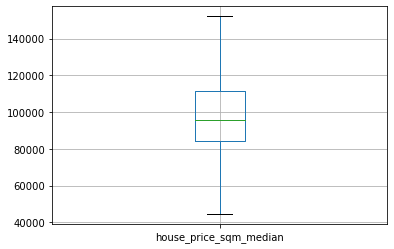

In [64]:
boxplot = house_sell_df_spb.boxplot(column=['house_price_sqm_median'],showfliers = False) 
#boxplot = sell_df_cleaned.boxplot(column=['last_price']) 

In [65]:
house_sell_df_cleaned = house_sell_df_spb[~((house_sell_df_spb.house_price_sqm_median > 145000) | (house_sell_df_spb.house_price_sqm_median < 49000))]

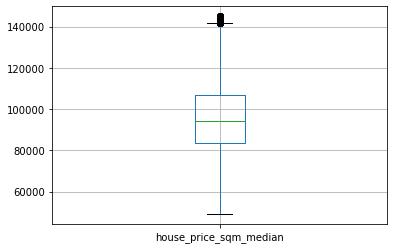

In [66]:
boxplot = house_sell_df_cleaned.boxplot(column=['house_price_sqm_median'],showfliers = True) 

In [67]:
max_price = house_sell_df_cleaned['house_price_sqm_median'].max()
house_sell_df_cleaned.loc[house_sell_df_cleaned['house_price_sqm_median'] == max_price]

,index,unified_address,house_price_sqm_median
9142,19406,"Россия, Санкт-Петербург, Новороссийская улица, 15",145000.0
13661,23925,"Россия, Санкт-Петербург, Столярный переулок, 11",145000.0
16809,27073,"Россия, Санкт-Петербург, проспект Медиков, 10к7",145000.0


In [68]:
min_price = house_sell_df_cleaned['house_price_sqm_median'].min()
house_sell_df_cleaned.loc[house_sell_df_cleaned['house_price_sqm_median'] == min_price]

,index,unified_address,house_price_sqm_median
19373,29637,"Россия, Санкт-Петербург, улица Дыбенко, 23к5",49152.201145


4. Find the most expensive and the most cheapest apartment for sale in St. Petersburg after cleaning outliers.

In [69]:
sell_df = sell_df.merge(house_sell_df)
sell_df_spb = sell_df[sell_df.unified_address.str.contains('Россия, Санкт-Петербург')].reset_index()
sell_df_spb_cleaned = sell_df[~((sell_df.price_per_sq_m/sell_df.house_price_sqm_median) > 5)]

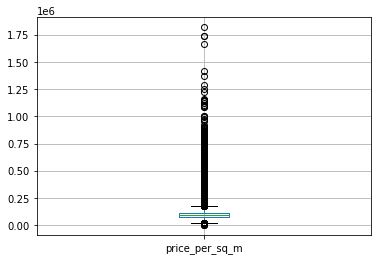

In [70]:
boxplot = sell_df_spb_cleaned.boxplot(column=['price_per_sq_m'],showfliers = True)

In [71]:
sell_df_spb_cleaned = sell_df_spb_cleaned[~((sell_df_spb_cleaned.price_per_sq_m > 162000) | (sell_df_spb_cleaned.price_per_sq_m < 26000))]

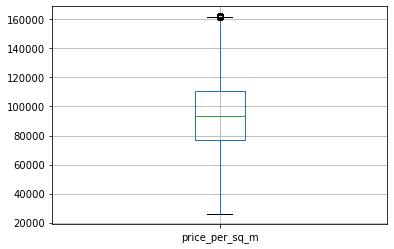

In [72]:
boxplot = sell_df_spb_cleaned.boxplot(column=['price_per_sq_m'],showfliers = True)

In [73]:
max_price = sell_df_spb_cleaned['last_price'].max()
sell_df_spb_cleaned.loc[sell_df_spb_cleaned['last_price'] == max_price]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
192531,5028522700621135235,2016-06-26T00:00:00+03:00,2017-01-09T00:00:00+03:00,117000000.0,1,False,5,False,753.0,NaN,NaN,NaN,0.0,1,2,"Россия, Санкт-Петербург, Благодатная улица, 24",1265418667461661047,155378.486056,274348.422497


In [74]:
min_price = sell_df_spb_cleaned['last_price'].min()
sell_df_spb_cleaned.loc[sell_df_spb_cleaned['last_price'] == min_price]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
237729,7340091001890472939,2017-09-19T00:00:00+03:00,2018-02-07T00:00:00+03:00,450000.0,1,False,1,False,17.0,7.0,10.0,100.0,0.0,1,2,"Россия, Ленинградская область, Выборг, Судостроительная улица, 30",9220595083957682734,26470.588235,26470.588235


# 5th Task
Calculate how many years does it take to cover all money spent on buying apartment by renting it. Find houses in St.Petersburg in which it's the most effective to invest in buying if you plan to rent and houses in which it will be the most ineffective.

Firstly, we need the dict with all the houses in SPb. We will start a cycle on the adress column of this table. We will loc the main database on the adress each iteration, and divide sell median by rent median. There is a possibility that the house won't have either of them. Then we need to set an Error option, and add the adress to error pull. Later we can assign the median of the values by street to it, for example.

In [103]:
Months_to_repay_list = []
spb_df['price_per_sq_m'] = spb_df.last_price/spb_df.area
spb_df_spb = spb_df[spb_df.unified_address.str.contains('Россия, Санкт-Петербург')].reset_index()
house_df = spb_df_spb.groupby(['unified_address','offer_type']).price_per_sq_m.median().reset_index()

#Timer set
from datetime import datetime

#Dict creation
dict_houses = dict.fromkeys(spb_df_spb['unified_address'])

#Error pull
error_addr = []
for i in dict_houses:
    try:
        # The division
        Months_to_repay_list.append([i,float(house_df.loc[(house_df['unified_address'] == i) & (house_df['offer_type'] == 1)]['price_per_sq_m']) / float(house_df.loc[(house_df['unified_address'] == i) & (house_df['offer_type'] == 2)]['price_per_sq_m'])])
    except TypeError:
        # If failed, go into the error pull 
        error_addr.append(i)
        
    #Counter & progress bar (sort of)
    if ((len(error_addr) + len(Months_to_repay_list)) % 5000 == 0):
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")
        print(current_time,'Finished ',(len(error_addr) + len(Months_to_repay_list)),'out of ',len(dict_houses),', ',len(error_addr),' errors')

21:25:20 Finished  5000 out of  26342 ,  791  errors
21:25:53 Finished  10000 out of  26342 ,  1852  errors
21:26:24 Finished  15000 out of  26342 ,  3369  errors
21:26:55 Finished  20000 out of  26342 ,  5445  errors
21:27:24 Finished  25000 out of  26342 ,  8610  errors


In [117]:
Months_to_repay = pd.DataFrame(Months_to_repay_list)
column_names = ['Address','Months_till_break_even']
Months_to_repay.columns = column_names

We need a way to estimate how many months it will take to repay for the flats which didn't have either sell or rent row. We can assign the mean value of the other houses on the same street. It is not very accurate, and the algorithm can be further deepened by average sq meters count, so it will predict the number of months based on average sq meters and street, but that's already ML territory and feels like an overkill, so we will stop just on the street.

In [124]:
unified_address_dict = {}
for i in range(0,len(Months_to_repay['Address'])):
    unified_address_dict[(Months_to_repay['Address'][i])[25:37]] = Months_to_repay[Months_to_repay.Address.str.contains((Months_to_repay['Address'][i])[25:37])].Months_till_break_even.mean()
    if i % 2500 == 0:
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")
        print(current_time,'Finished ',i,'out of ',len(Months_to_repay['Address']))

21:44:42 Finished  0 out of  16487
21:44:56 Finished  2500 out of  16487
21:45:10 Finished  5000 out of  16487
21:45:24 Finished  7500 out of  16487
21:45:38 Finished  10000 out of  16487
21:45:51 Finished  12500 out of  16487
21:46:05 Finished  15000 out of  16487


In [125]:
unified_address_dict

{'улица Шкапин': 149.720710449864,
 'Кушелевская ': 179.69852915124486,
 'Свердловская': 178.09571643126242,
 'Приморский п': 211.37806069748498,
 'Пушкин, улиц': 225.29470914704746,
 'Главная улиц': 221.76345305594492,
 'Аптекарский ': 249.97607950994336,
 'Комендантски': 200.61488571951782,
 'Каменноостро': 218.04894389125525,
 'проспект Обу': 180.4631963940964,
 'Большая Моне': 181.08690046278025,
 'улица Даниил': 200.56758443055537,
 'Варшавская у': 196.78458524674534,
 'Шпалерная ул': 193.06586802710288,
 '1-я Утиная у': 215.96399129369644,
 'улица Пестел': 220.80238607992382,
 'Фурштатская ': 211.48305649102437,
 'Полтавский п': 197.47982900899646,
 'улица Десант': 191.2633921826849,
 'Московский п': 207.65477561084975,
 'Ланское шосс': 177.95522801036196,
 'Шлиссельбург': 191.71527145894257,
 'проспект Мар': 187.4806941323895,
 'улица Генера': 207.02222844699233,
 'Петродворцов': 195.75577350493728,
 'Репищева ули': 186.33323619242668,
 'Английский п': 160.00617227761273,
 'прос

In [136]:
k = len(Months_to_repay)
error_count = 0
secondary_error_list = []
for i in error_addr:
    if i[25:37] in unified_address_dict:
        Months_to_repay = Months_to_repay.append(pd.DataFrame([[i,unified_address_dict[i[25:37]]]], columns=['Address','Months_till_break_even'], index=[k]))
        k += 1
    else:
        error_count += 1
        secondary_error_list.append(i)
    if (len(Months_to_repay)-16487) % 1000 == 0:
        current_time = now.strftime("%H:%M:%S")
        print(current_time,'Finished ',len(Months_to_repay)-16487,'out of ',len(error_addr),' Errors: ',error_count)

21:46:05 Finished  1000 out of  9855  Errors:  38
21:46:05 Finished  2000 out of  9855  Errors:  72
21:46:05 Finished  3000 out of  9855  Errors:  104
21:46:05 Finished  4000 out of  9855  Errors:  138
21:46:05 Finished  5000 out of  9855  Errors:  174
21:46:05 Finished  6000 out of  9855  Errors:  210
21:46:05 Finished  7000 out of  9855  Errors:  245
21:46:05 Finished  7000 out of  9855  Errors:  246
21:46:05 Finished  8000 out of  9855  Errors:  281
21:46:05 Finished  9000 out of  9855  Errors:  320


320 errors is not a lot, so we decided to neglect them.

In [151]:
Months_to_repay.loc[Months_to_repay['Months_till_break_even'] == Months_to_repay['Months_till_break_even'].min()]

,Address,Months_till_break_even
8362,"Россия, Санкт-Петербург, Пискарёвский проспект, 149",0.960526


We see that we forgot to clean out the outliers. Let's try to do it now.
## Important note
Once we do the outlier cut out, we will supposedly get rid of the wrong values, but the results will be not for the full DB, but for the averaged subDB.

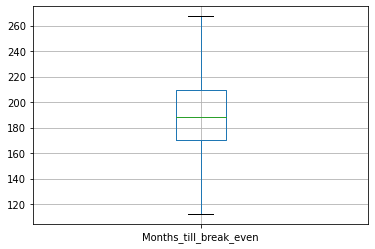

In [156]:
boxplot = Months_to_repay.boxplot(column=['Months_till_break_even'],showfliers = False)

In [155]:
Months_to_repay.to_csv('All_addresses.csv')

In [157]:
Months_to_repay = Months_to_repay[~((Months_to_repay.Months_till_break_even > 270) | (Months_to_repay.Months_till_break_even < 110))]

In [158]:
Months_to_repay.loc[Months_to_repay['Months_till_break_even'] == Months_to_repay['Months_till_break_even'].min()]

,Address,Months_till_break_even
2187,"Россия, Санкт-Петербург, Шпалерная улица, 13",110.211312


In [162]:
print('To repay for the most cheap average flat you will need to rent it out for ',round(float(Months_to_repay.loc[Months_to_repay['Months_till_break_even'] == Months_to_repay['Months_till_break_even'].min()]['Months_till_break_even'])/12,2),'years')

To repay for the most cheap flat you will need to rent it out for  9.18 years


In [159]:
Months_to_repay.loc[Months_to_repay['Months_till_break_even'] == Months_to_repay['Months_till_break_even'].max()]

,Address,Months_till_break_even
12000,"Россия, Санкт-Петербург, Петергоф, Санкт-Петербургский проспект, 33",269.969666


In [163]:
print('To repay for the most expensive flat you will need to rent it out for ',round(float(Months_to_repay.loc[Months_to_repay['Months_till_break_even'] == Months_to_repay['Months_till_break_even'].max()]['Months_till_break_even'])/12,2),'years')

To repay for the most expensive flat you will need to rent it out for  22.5 years
